In [ ]:
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm # color map
import seaborn as sns

import os.path
from os import path

from google.colab import files

import matplotlib.pyplot as plt
import cv2 as cv
import cv2

# Import the necessary libraries
from PIL import Image
from skimage.io import imread

import tqdm 
from tqdm import tqdm

from sklearn.preprocessing import OneHotEncoder,LabelEncoder

import warnings
warnings.filterwarnings("ignore")

!pip3 install pydot
!pip3 install graphviz
from keras.utils.vis_utils import plot_model

import tensorflow as tf

In [ ]:
files.upload()

Saving agriculture_clf_model_final.h5 to agriculture_clf_model_final.h5


In [ ]:
# load and evaluate a saved model
from keras.models import load_model
# load model
model = load_model('agriculture_clf_model_final.h5')
# summarize model.
#model.summary()
model.metrics_names

['loss', 'accuracy']

In [ ]:
# final_function1
def predict_crop_image_FUN1(path):
  """
     path as input gives the image with label
  """
  # required libraries
  import cv2 
  import pickle
  import numpy as np
  import matplotlib.pyplot as plt
  from keras.models import load_model

  """
   this function takes image path and predict the crop type among (jute,maize,rice,sugarcane,wheat)

  """
  #predict_datagen = ImageDataGenerator(rescale=1./255)
  #pdict = {0:"jute",1:"maize",2:"rice",3:"sugarcane",4:"wheat"} # predefined the labels
  
  class_labels = ["jute","maize","rice","sugarcane","wheat"]

  # read thwe image and applying the resize and reshaping that image into channels last 
  img = cv2.imread(path) # reead the image 
  img = cv2.resize(img, (224, 224)) # resizing the given image into 224,224
  img = img/255. # scaling the image
  img = np.array(img).reshape((1, 224, 224, 3))

  # load the model
  # predict the label of the given image
  best_model = load_model('agriculture_clf_model_final.h5')
  Y_prediction = best_model.predict(img) # predicting the labels in the array format 1-row , 5-columns.
  y_pred = np.argmax(Y_prediction[0]) # maximum probability value among all the predicted probability of each class. in the first row 

  # plot
  plt.title("prediction : {0} % {1:.2f} : ".format(class_labels[y_pred],Y_prediction[0,y_pred]*100),fontweight = 'bold',fontsize=14, color = 'orange')
  plt.imshow(plt.imread(path)) # plot the given image

In [ ]:
# final_function2
def predict_crop_image_FUN2(path,actual):
  # required libraries
  import cv2 
  import pickle
  import numpy as np
  import matplotlib.pyplot as plt
  from keras.models import load_model

  """
   this function takes image path and predict the crop type among (jute,maize,rice,sugarcane,wheat)

  """
  #predict_datagen = ImageDataGenerator(rescale=1./255)
  #pdict = {0:"jute",1:"maize",2:"rice",3:"sugarcane",4:"wheat"} # predefined the labels
  
  class_labels = ["jute","maize","rice","sugarcane","wheat"]

  # read thwe image and applying the resize and reshaping that image into channels last 
  img = cv2.imread(path) # reead the image 
  img = cv2.resize(img, (224, 224)) # resizing the given image into 224,224
  img = img/255. # scaling the image
  img = np.array(img).reshape((1, 224, 224, 3))

  # load the model
  
  # predict the label of the given image
  best_model = load_model('agriculture_clf_model_final.h5') # load the inception model with architecture and weights.
  Y_prediction = best_model.predict(img) # predicting the labels in the array format 1-row , 5-columns.
  y_pred = np.argmax(Y_prediction[0]) # maximum probability value among all the predicted probability of each class. in the first row 

  # plot
  #y_predict = class_labels[y_pred]
  y_predl = class_labels[y_pred]
  print("predicted : ",y_predl)
  print("actual : ",actual)

  
  if y_predl == actual:
    print('Correct prediction')
    plt.title("prediction : {0} % {1:.2f} ".format(class_labels[y_pred],Y_prediction[0,y_pred]*100))
    plt.imshow(plt.imread(path)) # plot the given image
  else:
    print("Messed up!!")
    predi = class_labels[int(y_pred)] 
    pre = Y_prediction[0,y_pred]*100
    a = class_labels.index(actual)
    act = Y_prediction[0,a]*100

    print('Actual class "{0}" with:{1:.2f}% and predicted class "{2}" with :{3:.2f}%'.format(actual,act,predi,pre))#class_labels[actual]))
    
    plt.imshow(plt.imread(path)) # plot the given image
  

### images prediction individually from the browser

##### rice

In [ ]:
!wget https://media.istockphoto.com/photos/ripe-rice-on-the-farm-in-autumn-season-picture-id1322226891?b=1&k=20&m=1322226891&s=170667a&w=0&h=ctDCK0iSdx8udyLRBtfaxvrcAZfbF_uzKclKWfFZRjM=

--2022-02-24 12:42:41--  https://media.istockphoto.com/photos/ripe-rice-on-the-farm-in-autumn-season-picture-id1322226891?b=1
Resolving media.istockphoto.com (media.istockphoto.com)... 13.225.143.51, 13.225.143.57, 13.225.143.52, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|13.225.143.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183722 (179K) [image/jpeg]
Saving to: ‘ripe-rice-on-the-farm-in-autumn-season-picture-id1322226891?b=1’

ripe-rice-on-the-fa 100%[===================>] 179.42K  --.-KB/s    in 0.1s    

2022-02-24 12:42:41 (1.42 MB/s) - ‘ripe-rice-on-the-farm-in-autumn-season-picture-id1322226891?b=1’ saved [183722/183722]



In [ ]:
!wget https://thumbs.dreamstime.com/b/rice-plant-green-paddy-137402194.jpg

--2022-02-24 12:44:21--  https://thumbs.dreamstime.com/b/rice-plant-green-paddy-137402194.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83555 (82K) [image/jpeg]
Saving to: ‘rice-plant-green-paddy-137402194.jpg’

rice-plant-green-pa 100%[===================>]  81.60K  --.-KB/s    in 0.007s  

2022-02-24 12:44:21 (11.1 MB/s) - ‘rice-plant-green-paddy-137402194.jpg’ saved [83555/83555]



In [ ]:
!wget https://media.istockphoto.com/photos/rice-planting-picture-id109724079?b=1&k=20&m=109724079&s=170667a&w=0&h=v2i4BxcmdiFkmEZhTmpSxPO1wb2_3iblv80FG7n4elw=

--2022-02-24 12:47:33--  https://media.istockphoto.com/photos/rice-planting-picture-id109724079?b=1
Resolving media.istockphoto.com (media.istockphoto.com)... 13.225.143.52, 13.225.143.57, 13.225.143.51, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|13.225.143.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251029 (245K) [image/jpeg]
Saving to: ‘rice-planting-picture-id109724079?b=1’

rice-planting-pictu 100%[===================>] 245.15K  --.-KB/s    in 0.1s    

2022-02-24 12:47:33 (1.93 MB/s) - ‘rice-planting-picture-id109724079?b=1’ saved [251029/251029]



In [ ]:
!wget https://media.istockphoto.com/photos/rice-paddies-of-novrese-picture-id1300801640?s=612x612

--2022-02-24 12:49:16--  https://media.istockphoto.com/photos/rice-paddies-of-novrese-picture-id1300801640?s=612x612
Resolving media.istockphoto.com (media.istockphoto.com)... 52.85.193.74, 52.85.193.128, 52.85.193.47, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|52.85.193.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44756 (44K) [image/jpeg]
Saving to: ‘rice-paddies-of-novrese-picture-id1300801640?s=612x612’

rice-paddies-of-nov 100%[===================>]  43.71K  --.-KB/s    in 0.008s  

2022-02-24 12:49:16 (5.48 MB/s) - ‘rice-paddies-of-novrese-picture-id1300801640?s=612x612’ saved [44756/44756]



In [ ]:
!wget https://images.unsplash.com/photo-1523539693385-e5e891eb4465?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8cmljZSUyMGZpZWxkfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60

--2022-02-24 12:50:24--  https://images.unsplash.com/photo-1523539693385-e5e891eb4465?ixlib=rb-1.2.1
Resolving images.unsplash.com (images.unsplash.com)... 151.101.26.208, 2a04:4e42:6::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.26.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1145775 (1.1M) [image/jpeg]
Saving to: ‘photo-1523539693385-e5e891eb4465?ixlib=rb-1.2.1’

photo-1523539693385 100%[===================>]   1.09M  --.-KB/s    in 0.04s   

2022-02-24 12:50:24 (30.0 MB/s) - ‘photo-1523539693385-e5e891eb4465?ixlib=rb-1.2.1’ saved [1145775/1145775]



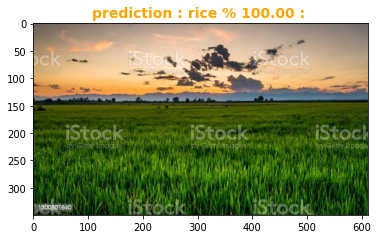

In [ ]:
ipr1 = 'rice-planting-picture-id109724079?b=1'
ipr2 = "rice-paddies-of-novrese-picture-id1300801640?s=612x612"
ipr3 = "photo-1523539693385-e5e891eb4465?ixlib=rb-1.2.1"
predict_crop_image_FUN1(ipr2)

predicted :  rice
actual :  rice
Correct prediction


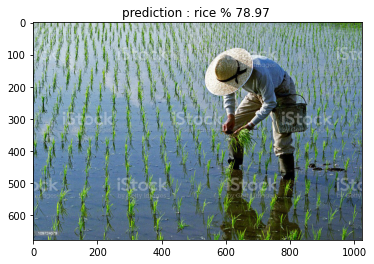

In [ ]:
predict_crop_image_FUN2(ipr1,"rice")

##### maize

In [ ]:
!wget https://images.all-free-download.com/images/graphiclarge/corn_maize_field_269475.jpg

--2022-02-24 14:05:05--  https://images.all-free-download.com/images/graphiclarge/corn_maize_field_269475.jpg
Resolving images.all-free-download.com (images.all-free-download.com)... 51.81.66.158
Connecting to images.all-free-download.com (images.all-free-download.com)|51.81.66.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157257 (154K) [image/jpeg]
Saving to: ‘corn_maize_field_269475.jpg’

corn_maize_field_26 100%[===================>] 153.57K   803KB/s    in 0.2s    

2022-02-24 14:05:05 (803 KB/s) - ‘corn_maize_field_269475.jpg’ saved [157257/157257]



In [ ]:
ipm="corn_maize_field_269475.jpg"

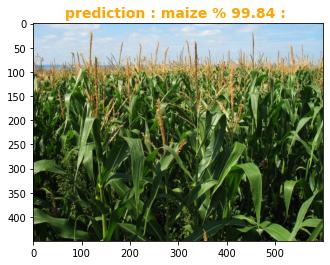

In [ ]:
predict_crop_image_FUN1(ipm)

##### jute

In [ ]:
!wget https://thumbs.dreamstime.com/z/jute-plant-field-cultivation-assam-india-green-tall-plants-leaves-agricultural-crops-agriculture-asia-asian-background-154951730.jpg

--2022-02-24 14:18:08--  https://thumbs.dreamstime.com/z/jute-plant-field-cultivation-assam-india-green-tall-plants-leaves-agricultural-crops-agriculture-asia-asian-background-154951730.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 575600 (562K) [image/jpeg]
Saving to: ‘jute-plant-field-cultivation-assam-india-green-tall-plants-leaves-agricultural-crops-agriculture-asia-asian-background-154951730.jpg’

jute-plant-field-cu 100%[===================>] 562.11K  --.-KB/s    in 0.03s   

2022-02-24 14:18:08 (17.8 MB/s) - ‘jute-plant-field-cultivation-assam-india-green-tall-plants-leaves-agricultural-crops-agriculture-asia-asian-background-154951730.jpg’ saved [575600/575600]



In [ ]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXRHxFsxR6p49oZyR-sceescg3tfB636MPOQ&usqp=CAU

--2022-02-24 14:22:32--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXRHxFsxR6p49oZyR-sceescg3tfB636MPOQ
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.137.138, 74.125.137.139, 74.125.137.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.137.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17338 (17K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcRXRHxFsxR6p49oZyR-sceescg3tfB636MPOQ’

images?q=tbn:ANd9Gc 100%[===================>]  16.93K  --.-KB/s    in 0s      

2022-02-24 14:22:32 (73.0 MB/s) - ‘images?q=tbn:ANd9GcRXRHxFsxR6p49oZyR-sceescg3tfB636MPOQ’ saved [17338/17338]



In [ ]:
ipj1 ="jute-plant-field-cultivation-assam-india-green-tall-plants-leaves-agricultural-crops-agriculture-asia-asian-background-154951730.jpg"
ipj2 = "images?q=tbn:ANd9GcRXRHxFsxR6p49oZyR-sceescg3tfB636MPOQ"

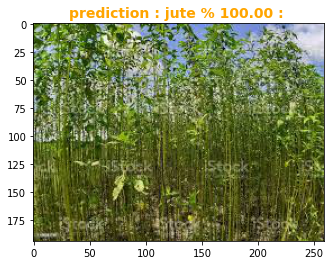

In [ ]:
predict_crop_image_FUN1(ipj2)

predicted :  jute
actual :  jute
Correct prediction


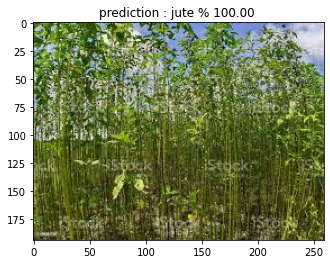

In [ ]:
predict_crop_image_FUN2(ipj2,"jute")

##### sugarcane

In [ ]:
!wget https://www.agrifarming.in/wp-content/uploads/2015/03/Sugarcane-Farming.jpg

--2022-02-24 14:24:18--  https://www.agrifarming.in/wp-content/uploads/2015/03/Sugarcane-Farming.jpg
Resolving www.agrifarming.in (www.agrifarming.in)... 139.59.72.7
Connecting to www.agrifarming.in (www.agrifarming.in)|139.59.72.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51608 (50K) [image/jpeg]
Saving to: ‘Sugarcane-Farming.jpg’

Sugarcane-Farming.j 100%[===================>]  50.40K   240KB/s    in 0.2s    

2022-02-24 14:24:20 (240 KB/s) - ‘Sugarcane-Farming.jpg’ saved [51608/51608]



In [ ]:
!wget https://www.renature.co/wp-content/uploads/2020/02/maxresdefault.jpg

--2022-02-24 14:25:49--  https://www.renature.co/wp-content/uploads/2020/02/maxresdefault.jpg
Resolving www.renature.co (www.renature.co)... 172.67.212.120, 104.21.23.181, 2606:4700:3037::ac43:d478, ...
Connecting to www.renature.co (www.renature.co)|172.67.212.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 336139 (328K) [image/jpeg]
Saving to: ‘maxresdefault.jpg’

maxresdefault.jpg   100%[===================>] 328.26K  1.10MB/s    in 0.3s    

2022-02-24 14:25:50 (1.10 MB/s) - ‘maxresdefault.jpg’ saved [336139/336139]



In [ ]:
ips1 = "Sugarcane-Farming.jpg"
ips2 = "maxresdefault.jpg"

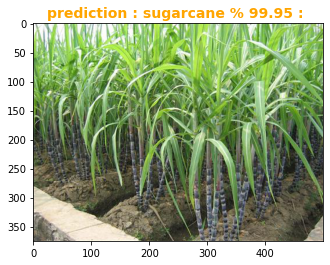

In [ ]:
predict_crop_image_FUN1(ips1)

predicted :  maize
actual :  sugarcane
Messed up!!
Actual class "sugarcane" with:0.03% and predicted class "maize" with :76.22%


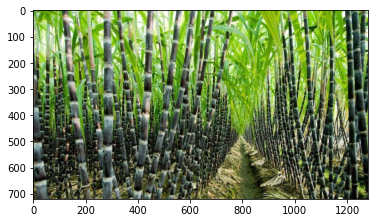

In [ ]:
predict_crop_image_FUN2(ips2,"sugarcane")

##### wheat

In [ ]:
!wget https://c1.wallpaperflare.com/preview/478/708/47/wheat-grain-crops-bread.jpg

--2022-02-24 14:30:31--  https://c1.wallpaperflare.com/preview/478/708/47/wheat-grain-crops-bread.jpg
Resolving c1.wallpaperflare.com (c1.wallpaperflare.com)... 172.67.129.81, 104.21.2.147, 2606:4700:3031::ac43:8151, ...
Connecting to c1.wallpaperflare.com (c1.wallpaperflare.com)|172.67.129.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182946 (179K) [image/jpeg]
Saving to: ‘wheat-grain-crops-bread.jpg’

wheat-grain-crops-b 100%[===================>] 178.66K   912KB/s    in 0.2s    

2022-02-24 14:30:32 (912 KB/s) - ‘wheat-grain-crops-bread.jpg’ saved [182946/182946]



In [ ]:
!wget https://ak.picdn.net/shutterstock/videos/14428813/thumb/1.jpg

--2022-02-24 14:34:04--  https://ak.picdn.net/shutterstock/videos/14428813/thumb/1.jpg
Resolving ak.picdn.net (ak.picdn.net)... 13.226.237.18, 13.226.237.98, 13.226.237.105, ...
Connecting to ak.picdn.net (ak.picdn.net)|13.226.237.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66587 (65K) [image/jpeg]
Saving to: ‘1.jpg’

1.jpg               100%[===================>]  65.03K  --.-KB/s    in 0.1s    

2022-02-24 14:34:04 (537 KB/s) - ‘1.jpg’ saved [66587/66587]



In [ ]:
ipw = "wheat-grain-crops-bread.jpg"
ipw = "1.jpg"

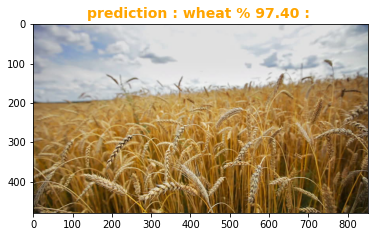

In [ ]:
predict_crop_image_FUN1(ipw)

predicted :  wheat
actual :  wheat
Correct prediction


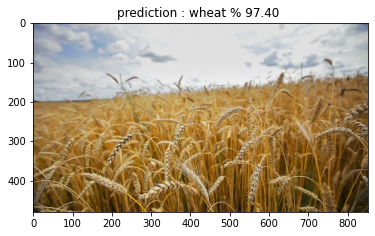

In [ ]:
predict_crop_image_FUN2(ipw,"wheat")

### fun-2 on set data

In [ ]:
# load the json file from thee device
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kancharlasairam","key":"6e753fde060715f5f40c889675ec7e5c"}'}

In [ ]:
def load_dataset():
  import os.path
  from os import path

  """
    this function is used to load the dataset based on my required format and folder.
  """
  if path.exists("/content/agriculture-crop-images.zip"):
    print("loaded the dataset...")
  else:
    ! pip install -q kaggle # install the kaggle library
    ! mkdir ~/.kaggle # create root directory
    ! cp kaggle.json ~/.kaggle/ #  Make directory named kaggle and copy kaggle.json file there.

    ! chmod 600 ~/.kaggle/kaggle.json # Change the permissions of the file.
    ! kaggle datasets download -d aman2000jaiswal/agriculture-crop-images # download the dataset with -d / competition with -c
  
  # for my comfort create the kaggle/input directory to unzip the files.

  if path.isdir('/kaggle/input'):  # check if the /kaggle/input exists or not?
  # if the folder is created already.
    if path.exists("/kaggle/input/Crop_details.csv"): # /content/kaggle/input/Crop_details.csv
      print("already existed and loaded...")
    else:
      # unzip the dataset
      # unzip the list of data from the drive list files
      # refer code: !unzip path_to_file.zip -d path_to_directory(destination)  
      print("unzip the dataset....")
      ! unzip /content/agriculture-crop-images.zip -d /kaggle/input
  else: # if the /kaggle/input is not created then create the folders.

      # create kaggle directory for my comfort
      ! mkdir /kaggle
      ! mkdir /kaggle/input
      # unzip the dataset
      print("unzip the dataset ....")
      ! unzip /content/agriculture-crop-images.zip -d /kaggle/input  # unzip the folder into the destination where you required.
  
  return None

In [ ]:
load_dataset() # loaded the dataset 

In [ ]:
load_dataset() # cross check once you loaded the dataset . 

loaded the dataset...
already existed and loaded...


In [ ]:
# load the datasets 
# jute -0
# maize -1
# rice -2
# sugarcane-3
# wheat -4
from sklearn.model_selection import train_test_split
x = df["path"]
y = df["crop"]
#df1 = df[['path', 'croplabel']] # takes only the image and mask values
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.11, random_state=42,stratify=y)#dataset is less so takes the 90-10 ratio.
print("the shape of the train data : ",(X_train.shape,y_train.shape))
print("the shape of the test data : ",(X_test.shape,y_test.shape))

In [ ]:
# load the cropdetails file that contains the 3 columns image path and crop name and crop label. we don't need Unnamed column so drop that.
import pandas as pd
df = pd.read_csv("/kaggle/input/Crop_details.csv",index_col=None).drop("Unnamed: 0",axis=1)
df.head(3)

,path,crop,croplabel
0,/kaggle/input/kag2/sugarcane/sugarcane037ahs.jpeg,sugarcane,3
1,/kaggle/input/kag2/sugarcane/sugarcane034a.jpeg,sugarcane,3
2,/kaggle/input/kag2/sugarcane/sugarcane032arot....,sugarcane,3


In [ ]:
# for creating the basic pipeline
def dataset_creation_pipeline(dataset):
    flat = [] # create an empty list to store the array formatted image.
    for i in tqdm(dataset):
        img = plt.imread(i) # read the image
        img = img/255. # normalize the image
        flat.append(img) # append into the list
    flat_array =  np.array(flat) # convert the list into the array 
    valued_img = flat_array.reshape(-1,224,224,3) # reshape the image into required format here I was used 224,224
    return valued_img

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

import pickle
import tensorflow as tf
from keras.models import load_model

In [ ]:
def crop_images_FUN2(data_img_paths,actual_labels):
  from tqdm import tqdm
  # data creation using paths of the images
  x = data_img_paths
  dx_test = dataset_creation_pipeline(x)
  
  # load the model
  best_model = load_model("agriculture_clf_model_final.h5")

  # predicting the model
  y_predict = best_model.predict(dx_test)

  predict_labels = np.argmax(y_predict,axis=1)

  # plot confusion matrix
  plt.figure(figsize=(8,8))
  class_labels = ["jute","maize","rice","sugarcane","wheat"]
  fig = sns.heatmap(confusion_matrix(actual_labels,predict_labels),annot=True,cmap="Greens",xticklabels=class_labels,yticklabels=class_labels)
  fig.set_xlabel("Prediction",fontsize=20,color="brown")
  fig.xaxis.set_label_position('top')
  fig.xaxis.tick_top() # able to set top , bottom , for y axis able to set right/left.
  fig.set_ylabel("Actual",fontsize=20,color="brown")

  acc1 = accuracy_score(actual_labels,predict_labels)
  print("accuracy of the model : ",acc1)


100%|██████████| 999/999 [00:01<00:00, 543.07it/s]


accuracy of the model :  1.0


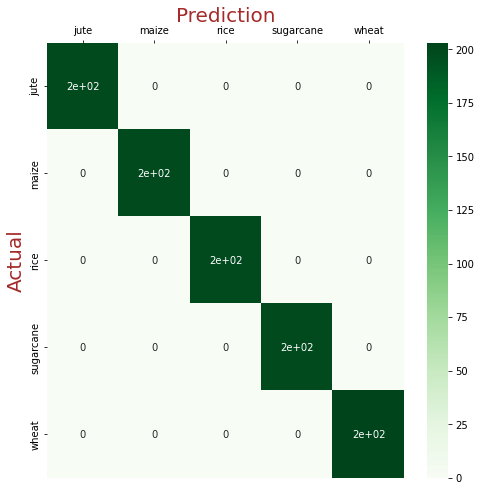

In [ ]:
crop_images_FUN2(df["path"],df["croplabel"])